In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import numpy as np
import warnings

%matplotlib inline

In [8]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])
data["Month"] = pd.to_datetime(data["Month"], format="%Y-%m")
data.set_index("Month", inplace=True)

In [9]:
data.shape

(144, 1)

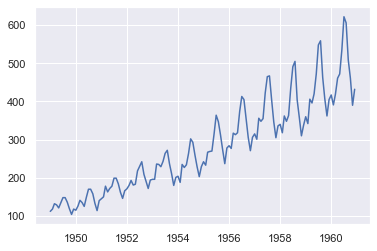

In [86]:
plt.plot(data['#Passengers'], label='data')
plt.show()

## Part I: Exponentail Smoothing

## 1. Exponential Smoothing Curve

In [11]:
ema_passagener_1 = data.ewm(com=3.8).mean()
ema_passagener_2 = data.ewm(com=16.8).mean()

Text(0, 0.5, 'passengers')

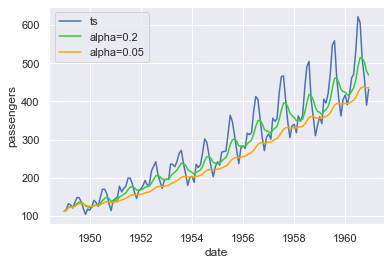

In [12]:
plt.plot(data, label='ts')
plt.plot(ema_passagener_1, color='limegreen', label='alpha=0.2')
plt.plot(ema_passagener_2, color='orange', label='alpha=0.05')
plt.legend()
plt.xlabel('date')
plt.ylabel('passengers')

## Import Exponential Smoothing Package

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## Split Data

In [14]:
# use last year as test data
train=data[0:144-12] 
test=data[-12:]

## 2. Simple Average

\begin{equation*}
\hat{y}_{t+h|t}=\frac{1}{t}\sum_{i=1}^{t}y_{i}
\end{equation*}

In [15]:
y_hat_simple_avg = test.copy()
y_hat_simple_avg['avg_forecast'] = train['#Passengers'].mean()

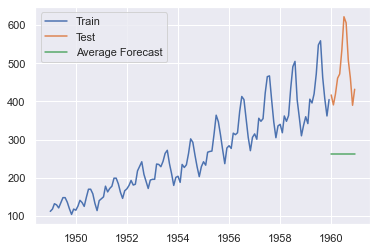

In [16]:
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_simple_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

## 3. Moving Average

\begin{equation*}
\hat{y}_{t+h|t}=\frac{1}{T}\sum_{i=t-1}^{t-T}y_i
\end{equation*}

where:

-  $T$ is moving window

In [17]:
y_moving_avg = test.copy()
y_moving_avg['moving_avg_forecast'] = train['#Passengers'].rolling(60).mean().iloc[-1]

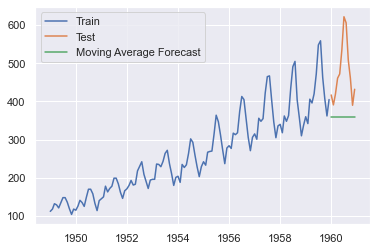

In [18]:
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_moving_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

## 4. Simple Exponential Smoothing

\begin{equation*}
\hat{y}_{t+h|t}=l_t\\
l_t=\alpha y_{t}+(1-\alpha)l_{t-1}
\end{equation*}

where:

-  $l_{t}$ is the level at time t
-  $\alpha$ is smoothing parameter for level

In [23]:
fit_se_alpha_1 = SimpleExpSmoothing(np.asarray(train['#Passengers'])).fit(smoothing_level=0.2)
fit_se_alpha_2 = SimpleExpSmoothing(np.asarray(train['#Passengers'])).fit(smoothing_level=0.6)

In [24]:
y_hat_exponential_smoothing = test.copy()

In [25]:
y_hat_exponential_smoothing['es_alpha_1'] = fit_se_alpha_1.forecast(len(test))
y_hat_exponential_smoothing['es_alpha_2'] = fit_se_alpha_2.forecast(len(test))

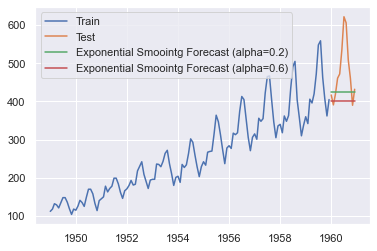

In [26]:
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_exponential_smoothing['es_alpha_1'], label='Exponential Smoointg Forecast (alpha=0.2)')
plt.plot(y_hat_exponential_smoothing['es_alpha_2'], label='Exponential Smoointg Forecast (alpha=0.6)')
plt.legend(loc='best')
plt.show()

## 5. Holt Linear Trend

\begin{equation*}
\hat{y}_{t+h|t}=l_t+hb_t\\
l_t=\alpha y_t+(1-\alpha)(l_{t-1}+b_{t-1})\\
b_t=\beta^{\ast}(l_t-l_{t-1})+(1-\beta^{\ast})b_{t-1}
\end{equation*}

where:

-  $l_{t}$ is the level at time t
-  $b_{t}$ is the slope at time t
-  $\alpha$ is smoothing parameter for level
-  $\beta^{\ast}$ is smoothing parameter for slope

In [28]:
holt_linear_model = Holt(np.asarray(train['#Passengers'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)

In [29]:
y_hat_holt = test.copy()
y_hat_holt['Holt_linear'] = holt_linear_model.forecast(len(test))

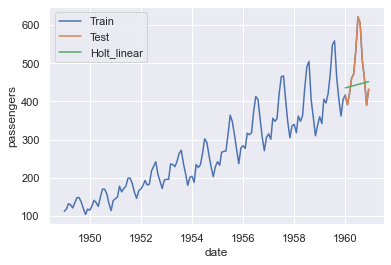

In [30]:
plt.plot(data['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_holt['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('passengers')
plt.show()

## 6. Holt-Winters Seasonal Model

\begin{equation*}
\hat{y}_{t+h|t}=l_t+hb_t+s_{t+h-m(k+1)}\\
l_t=\alpha(y_t-s_{t-m})+(1-\alpha)(l_{t-1}+b_{t-1})\\
b_t=\beta^{\ast}(l_t-l_{t-1})+(1-\beta^{\ast})b_{t-1}\\
s_t=\gamma(y_t-l_t)+(1-\gamma)s_{t-m}
\end{equation*}

where:

-  $l_{t}$ is the level at time t
-  $b_{t}$ is the slope at time t
-  $s_{t}$ is the seasonal component
-  $\alpha$ is smoothing parameter for level
-  $\beta^{\ast}$ is smoothing parameter for slope
-  $\gamma$ is smoothing parameter for seasonal component
-  $k$ is integer part of (h-1)/m

In [31]:
holt_winter_seasonal_model = ExponentialSmoothing(np.asarray(train['#Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

/Users/lujiewen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [33]:
y_hat_holt_winters = test.copy()

In [34]:
y_hat_holt_winters['Holt_Winter'] = holt_winter_seasonal_model.forecast(len(test))

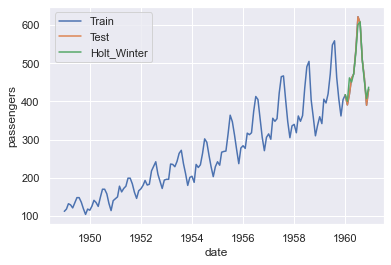

In [35]:
plt.plot(data['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_hat_holt_winters['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('passengers')
plt.show()

# Part II: ARIMA

### Take logarithm transformation

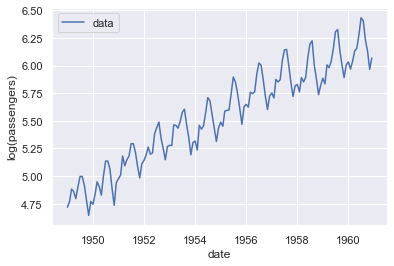

In [36]:
plt.plot(np.log(data['#Passengers']), label='data')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('log(passengers)')
plt.show()

### First Order Difference

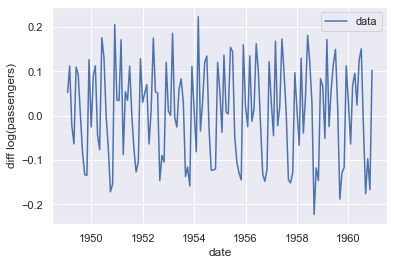

In [37]:
plt.plot(np.log(data['#Passengers']).diff(), label='data')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('diff log(passengers)')
plt.show()

### Plot ACF & PACF

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [39]:
ts_log = np.log(data['#Passengers'])

In [40]:
ts_log_diff = ts_log - ts_log.shift()

In [41]:
ts_log_diff.dropna(inplace=True)

Text(0, 0.5, 'ACF')

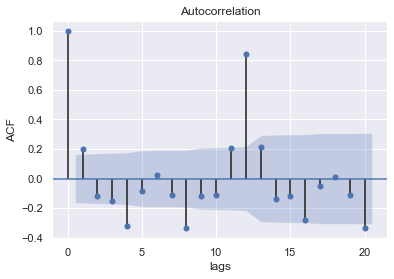

In [42]:
plot_acf(ts_log_diff.values, lags=20)
plt.xlabel('lags')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

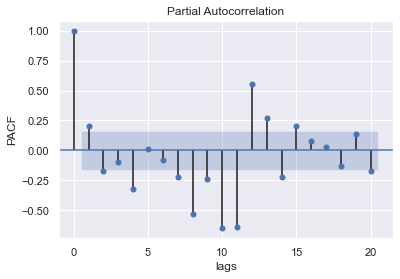

In [43]:
plot_pacf(ts_log_diff.values, lags=20)
plt.xlabel('lags')
plt.ylabel('PACF')

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
warnings.simplefilter('ignore')
fit_arima = SARIMAX(np.log(train['#Passengers']), order=(1, 1, 1), seasonal_order=(1,1,1,12)).fit()

In [46]:
y_sarima = test.copy()

In [47]:
y_sarima['SARIMA'] = np.exp(fit_arima.predict(start="1960-01-01", end="1960-12-01", dynamic=True))

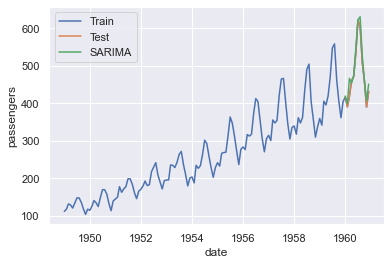

In [48]:
plt.plot(data['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_sarima['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('passengers')
plt.show()

# Part III: Prophet

In [50]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [51]:
train.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [55]:
# create dataframe for Prophet model
df = pd.DataFrame()
df["ds"] = train.index
df["y"] = train["#Passengers"].values

In [80]:
#m = Prophet(seasonality_mode='additive')
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
future = pd.DataFrame()
#future["ds"] = list(train.index) + list(test.index)
future["ds"] = list(test.index)

In [82]:
forecast = m.predict(future)

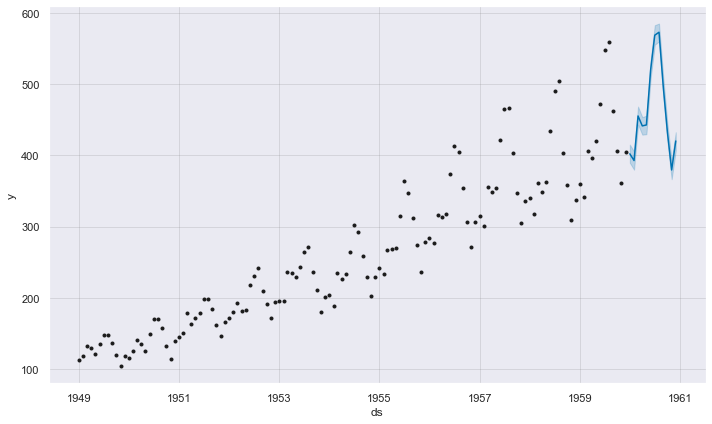

In [83]:
# Python
fig = m.plot(forecast)

In [84]:
y_prophet = forecast[['ds', 'yhat']]
y_prophet.set_index("ds", inplace=True)

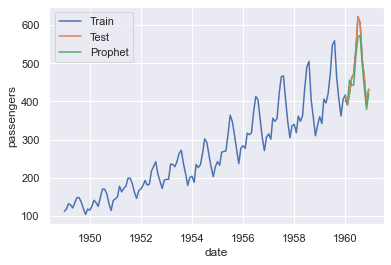

In [85]:
plt.plot(data['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(y_prophet['yhat'], label='Prophet')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('passengers')
plt.show()

# Part IV: Deep Learning